[1]	valid_0's multi_logloss: 1.02277
Training until validation scores don't improve for 5 rounds
[2]	valid_0's multi_logloss: 0.943765
[3]	valid_0's multi_logloss: 0.873274
[4]	valid_0's multi_logloss: 0.810478
[5]	valid_0's multi_logloss: 0.752973
[6]	valid_0's multi_logloss: 0.701621
[7]	valid_0's multi_logloss: 0.654982
[8]	valid_0's multi_logloss: 0.611268
[9]	valid_0's multi_logloss: 0.572202
[10]	valid_0's multi_logloss: 0.53541
[11]	valid_0's multi_logloss: 0.502582
[12]	valid_0's multi_logloss: 0.472856
[13]	valid_0's multi_logloss: 0.443853
[14]	valid_0's multi_logloss: 0.417764
[15]	valid_0's multi_logloss: 0.393613
[16]	valid_0's multi_logloss: 0.370679
[17]	valid_0's multi_logloss: 0.349936
[18]	valid_0's multi_logloss: 0.330669
[19]	valid_0's multi_logloss: 0.312805
[20]	valid_0's multi_logloss: 0.296973
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.296973
Accuracy of lightgbm: 1.0


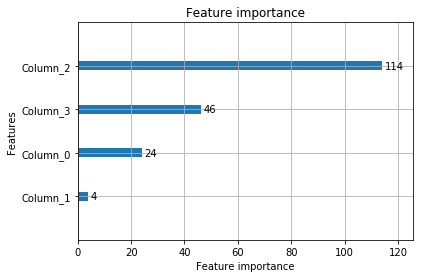

In [2]:
# 导入相关模块
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# 导入iris数据集
iris = load_iris()
data = iris.data
target = iris.target
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=43)
# 创建lightgbm分类模型
gbm = lgb.LGBMClassifier(objective='multiclass',
                         num_class=3,
                         num_leaves=31,
                         learning_rate=0.05,
                         n_estimators=20)
# 模型训练
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)
# 预测测试集
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# 模型评估
print('Accuracy of lightgbm:', accuracy_score(y_test, y_pred))
lgb.plot_importance(gbm)
plt.show();